# Imports and Load Data

In [2]:
import pandas as pd 
import gzip 
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
import string
import pickle as pkl
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np  # linear algebra
import pandas as pd # data processing, like text ,CSV or pdf file

df = pd.read_csv(r'C:\Users\AR 161\Desktop\Final Project\kindle_reviews.csv')


In [4]:
df.head(10)   # here i check data by using head function also we pass perameter in integer value  

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
5,5,B000F83SZQ,"[0, 0]",4,A beautiful in-depth character description mak...,"05 26, 2014",A1RK2OCZDSGC6R,ubavka seirovska,Review,1401062400
6,6,B000F83SZQ,"[0, 0]",4,I enjoyed this one tho I'm not sure why it's c...,"06 10, 2014",A2HSAKHC3IBRE6,Wolfmist,Nice old fashioned story,1402358400
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400
8,8,B000FA64PA,"[0, 0]",5,Darth Maul working under cloak of darkness com...,"10 11, 2013",A1UG4Q4D3OAH3A,dsa,Darth Maul,1381449600
9,9,B000FA64PA,"[0, 0]",4,This is a short story focused on Darth Maul's ...,"02 13, 2011",AQZH7YTWQPOBE,Enjolras,"Not bad, not exceptional",1297555200


In [5]:
len(df)   # here i check the lenght 

982619

In [6]:
df.isnull().sum()   # for missing value 

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [7]:
#drop the rows where there are no reviews
df.dropna(subset = ['reviewText'], inplace = True)

#changing the reviewTime column to be of datetime type
df.reviewTime = pd.to_datetime(df.reviewTime)

#creating a column with just the year so in this way we can also easily find review of each years
df['Year'] = df.reviewTime.dt.year

#show 7 top value of each row 
df.head(7)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,2014
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,2014
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014
5,5,B000F83SZQ,"[0, 0]",4,A beautiful in-depth character description mak...,2014-05-26,A1RK2OCZDSGC6R,ubavka seirovska,Review,1401062400,2014
6,6,B000F83SZQ,"[0, 0]",4,I enjoyed this one tho I'm not sure why it's c...,2014-06-10,A2HSAKHC3IBRE6,Wolfmist,Nice old fashioned story,1402358400,2014


# Analyse data with graphically representation 

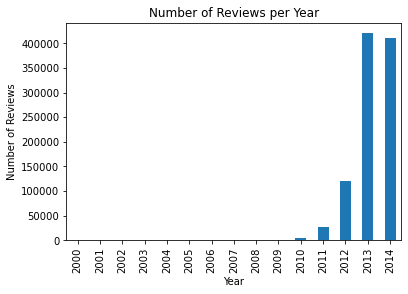

In [8]:
import matplotlib.pyplot as plt  # for graphically representation 
df.Year.value_counts().sort_index().plot(kind = 'bar')  
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

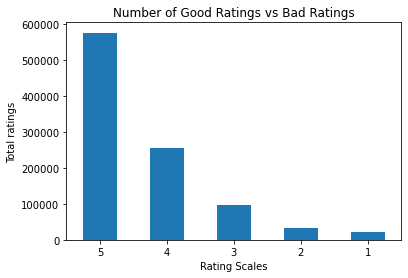

In [9]:
df.overall.value_counts().plot(kind = 'bar')
plt.title('Number of Good Ratings vs Bad Ratings')
plt.xlabel('Rating Scales')
plt.xticks(rotation = 0)
plt.ylabel('Total ratings')
plt.show()

# Text Preprocessing

In [10]:
del df['Unnamed: 0']
del df['asin']         # here i delete All unless column
del df['helpful']
del df['reviewTime']
del df['reviewerID']
del df['reviewerName']
del df['unixReviewTime']

In [11]:
df.head(10)  # again check datast 

,overall,reviewText,summary,Year
0,5,I enjoy vintage books and movies so I enjoyed ...,Nice vintage story,2014
1,4,This book is a reissue of an old one; the auth...,Different...,2014
2,4,This was a fairly interesting read. It had ol...,Oldie,2014
3,5,I'd never read any of the Amy Brewster mysteri...,I really liked it.,2014
4,4,"If you like period pieces - clothing, lingo, y...",Period Mystery,2014
5,4,A beautiful in-depth character description mak...,Review,2014
6,4,I enjoyed this one tho I'm not sure why it's c...,Nice old fashioned story,2014
7,4,Never heard of Amy Brewster. But I don't need ...,Enjoyable reading and reminding the old times,2014
8,5,Darth Maul working under cloak of darkness com...,Darth Maul,2013
9,4,This is a short story focused on Darth Maul's ...,"Not bad, not exceptional",2011


In [12]:
df.info()  # for information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982597 entries, 0 to 982618
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     982597 non-null  int64 
 1   reviewText  982597 non-null  object
 2   summary     982596 non-null  object
 3   Year        982597 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 37.5+ MB


In [13]:
del df['Year'] # here i delete column of year

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982597 entries, 0 to 982618
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     982597 non-null  int64 
 1   reviewText  982597 non-null  object
 2   summary     982596 non-null  object
dtypes: int64(1), object(2)
memory usage: 30.0+ MB


In [15]:
df.head(10)

,overall,reviewText,summary
0,5,I enjoy vintage books and movies so I enjoyed ...,Nice vintage story
1,4,This book is a reissue of an old one; the auth...,Different...
2,4,This was a fairly interesting read. It had ol...,Oldie
3,5,I'd never read any of the Amy Brewster mysteri...,I really liked it.
4,4,"If you like period pieces - clothing, lingo, y...",Period Mystery
5,4,A beautiful in-depth character description mak...,Review
6,4,I enjoyed this one tho I'm not sure why it's c...,Nice old fashioned story
7,4,Never heard of Amy Brewster. But I don't need ...,Enjoyable reading and reminding the old times
8,5,Darth Maul working under cloak of darkness com...,Darth Maul
9,4,This is a short story focused on Darth Maul's ...,"Not bad, not exceptional"


In [16]:
df.isnull().sum()  # for missing value 

overall       0
reviewText    0
summary       1
dtype: int64

In [17]:
df['reviewText'] = df['reviewText'] + ' ' + df['summary']  # i combine here summery and reviewText 

In [18]:
del df['summary']  # now the summary column delete because in above i combine data of summery and reviewText

In [19]:
df.head(10)  # again cll 

,overall,reviewText
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."
5,4,A beautiful in-depth character description mak...
6,4,I enjoyed this one tho I'm not sure why it's c...
7,4,Never heard of Amy Brewster. But I don't need ...
8,5,Darth Maul working under cloak of darkness com...
9,4,This is a short story focused on Darth Maul's ...


In [20]:
def review_sentiment(rating): 
    # Replacing rating of 1,2,3 with 0(not good) and 4,5 with 1(good) 
    if(rating == 1 or rating == 2 or rating == 3):
        return 0
    else:
        return 1

In [21]:
df.overall = df.overall.apply(review_sentiment)
df.head()

,overall,reviewText
0,1,I enjoy vintage books and movies so I enjoyed ...
1,1,This book is a reissue of an old one; the auth...
2,1,This was a fairly interesting read. It had ol...
3,1,I'd never read any of the Amy Brewster mysteri...
4,1,"If you like period pieces - clothing, lingo, y..."


In [22]:
df.overall.value_counts()

1    829256
0    153341
Name: overall, dtype: int64

In [23]:
df.isnull().sum() # check missing value

overall       0
reviewText    1
dtype: int64

In [24]:
#drop the rows where there are no reviews
df.dropna(subset = ['reviewText'], inplace = True)

In [25]:
df.isnull().sum() # here we can see no missing value 

overall       0
reviewText    0
dtype: int64

In [26]:
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [27]:
def clean_text(text):  # function for data cleaning 
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = i.strip().lower()
            final_text.append(word)
    return " ".join(final_text) 

In [28]:
df['reviewText'] = df['reviewText'].apply(clean_text)

In [29]:
data=df['reviewText'].copy()

In [30]:
df.overall=df.overall.astype('int')

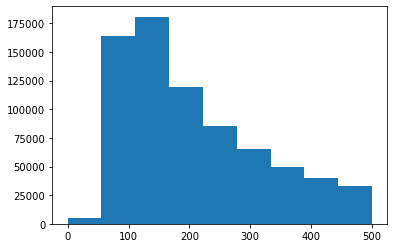

In [31]:
import numpy as np
plt.hist(df.reviewText.apply(len),bins=np.linspace(0,500,10))
plt.show()

In [32]:
mask=(df.reviewText.str.len()>50) & (df.reviewText.str.len()<300)

In [33]:
data=data.loc[mask]

In [34]:
# loads data from a pickle file
def load_dataset(filename):
    with open('C:\\Users\\AR 161\\Desktop\\Final Project\\Data Set\\kindle_reviews.csv','rb') as handle:
        dataset = pkl.load(handle)
    return dataset


# saves updated dataset
def save_dataset(dataset,filename):
    with open('C:\\Users\\AR 161\\Desktop\\Final Project\\Data Set\\kindle_reviews.csv', 'wb') as handle:
        pkl.dump(dataset, handle)

        # save tokenizer
def save_tokenizer(tokenizer):
    with open('C:\\Users\\AR 161\\Desktop\\Final Project\\Data Set\\kindle_reviews.csv', 'wb') as handle:
        pkl.dump(tokenizer, handle)

In [35]:
from keras.preprocessing.text import Tokenizer,text_to_word_sequence #again Tokenize with keras 
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=20000, split=' ')
tokenizer.fit_on_texts(df.reviewText.values)
save_tokenizer(tokenizer)

In [36]:
df['tokenized'] = tokenizer.texts_to_sequences(df.reviewText.values)

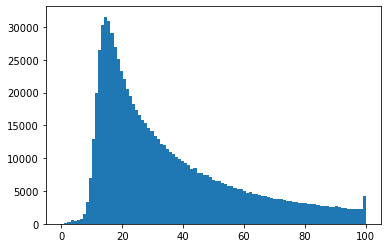

In [37]:
plt.hist(df.tokenized.apply(len),bins=np.linspace(0,100,100))
plt.show()

In [38]:
max(df.tokenized.apply(len))

2165

In [39]:
del tokenizer

In [40]:
padded_ = pad_sequences(df.tokenized,maxlen=80,padding='post')

In [41]:
padded_.shape

(982596, 80)

In [42]:
X=padded_

In [43]:
y= pd.get_dummies(df.overall)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [82]:
save_dataset([X_train, X_test, Y_train, Y_test],'final_data.pkl')

In [46]:
Y_test.shape

(324257, 2)

# Now we Check the value of X_train, X_test, Y_train, Y_test

In [47]:
X_train

array([[  18,   11,   18, ...,    0,    0,    0],
       [  10,    6,    1, ...,    0,    0,    0],
       [ 232,  384,  209, ...,    0,    0,    0],
       ...,
       [ 154,    2,   38, ...,    0,    0,    0],
       [  38,  343,   10, ...,    0,    0,    0],
       [  46,  214, 5301, ..., 8951,  170, 5017]])

In [48]:
X_test

array([[12122,   123,   171, ...,     0,     0,     0],
       [   18,     1,     2, ...,     0,     0,     0],
       [   43,   276,   420, ...,   582,    55,    22],
       ...,
       [   20,   713,   186, ...,     0,     0,     0],
       [   19,   316,   489, ...,     0,     0,     0],
       [  875,   211,     3, ...,     0,     0,     0]])

In [49]:
Y_train

,0,1
502300,0,1
486290,0,1
391298,1,0
7185,1,0
325648,0,1
...,...,...
623652,1,0
966348,0,1
537901,0,1
232353,1,0


In [50]:
Y_test

,0,1
241889,0,1
343046,0,1
496496,0,1
836859,0,1
138127,0,1
...,...,...
342416,0,1
927518,0,1
578481,0,1
415563,0,1


# Standardizing the Data

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler_object =  MinMaxScaler()

In [53]:
scaler_object.fit(X_train)

MinMaxScaler()

In [54]:
scaled_X_train = scaler_object.transform(X_train)

In [55]:
scaled_X_test = scaler_object.transform(X_test)

In [56]:
X_train.max()  # check maximum

19999

In [57]:
scaled_X_train.max()

1.0

In [58]:
X_train   # here i check the data 

array([[  18,   11,   18, ...,    0,    0,    0],
       [  10,    6,    1, ...,    0,    0,    0],
       [ 232,  384,  209, ...,    0,    0,    0],
       ...,
       [ 154,    2,   38, ...,    0,    0,    0],
       [  38,  343,   10, ...,    0,    0,    0],
       [  46,  214, 5301, ..., 8951,  170, 5017]])

In [59]:
scaled_X_train  # here i check the data 

array([[8.50127519e-04, 5.50055006e-04, 9.00045002e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.50067510e-04, 3.00030003e-04, 5.00025001e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15517328e-02, 1.92019202e-02, 1.04505225e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.65114767e-03, 1.00010001e-04, 1.90009500e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.85027754e-03, 1.71517152e-02, 5.00025001e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.25033755e-03, 1.07010701e-02, 2.65063253e-01, ...,
        4.47594759e-01, 8.50212553e-03, 2.50875088e-01]])

# Building the Network with Keras

In [60]:
from keras.models import Sequential
from keras.layers import Dense

In [61]:
model = Sequential()

In [86]:
model.add(Dense(3,input_dim =4, activation='relu'))
model.add(Dense(3,input_dim =4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.predict(scaled_X_test)

# Evaluating Model Performance

In [ ]:
model.evaluate(x=scaled_X_test, y = y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict_classes(scaled_X_test)
confusion_matrix(y_test.argmax(axis=1), predictions)
print(classification_report(y_test.argmax(axis=1), predictions))

               precision       recall      f1-score   support
          
           0         1.00        1.00       1.00           19
           1         0.93        0.93       0.92           15
           2         0.94        0.94       0.93           16

       accuracy                           0.93             50
    
       macro avg       0.96      0.96     0.93             50
    
      weighted avg       0.96      0.96   0.94             50
